2. Analiza danych

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from random import randint

2.1. Wczytanie danych z pliku do DataFrame

In [3]:
data_file_name = 'data_after_preparation.csv'
data = pd.read_csv(data_file_name)

2.2. Analiza danych

Typy danych

In [4]:
data.dtypes

Date              object
text              object
bitcoin_price    float64
bitcoin_trend      int64
dtype: object

Zakres dat

In [5]:
start_date = data['Date'].min()
end_date = data['Date'].max()

print(f'start date: {start_date}')
print(f'end date: {end_date}')

start date: 2014-09-17
end date: 2019-05-27


Rozkład danych

In [6]:
zero_count = data['bitcoin_trend'].eq(0).sum()
one_count = data['bitcoin_trend'].eq(1).sum()
minus_one_count = data['bitcoin_trend'].eq(-1).sum()
print("Liczba wartości 0 w kolumnie 'bitcoin_trend':", zero_count)
print("Liczba wartości 1 kolumnie 'bitcoin_trend':", one_count)
print("Liczba wartości -1 w kolumnie 'bitcoin_trend':", minus_one_count)
suma = zero_count + one_count+ minus_one_count
print(f"Procentowy udział wartości w kolumnie 'bitcoin_trend': {zero_count/suma:%}, {one_count/suma:%}, {minus_one_count/suma:%}")

Liczba wartości 0 w kolumnie 'bitcoin_trend': 0
Liczba wartości 1 kolumnie 'bitcoin_trend': 2116521
Liczba wartości -1 w kolumnie 'bitcoin_trend': 1816090
Procentowy udział wartości w kolumnie 'bitcoin_trend': 0.000000%, 53.819740%, 46.180260%


Losowy tekst tweeta

In [7]:
print(data['text'][randint(0, len(data['text']))])

Check all here --> https://www.thirdbrainfx.com/crypto.html  
On #Poloniex #GRC to #BTC -- > 0.00000368, volume --> 1871963 
On #Cex.io #ETH to #USD -- > 417.38, volume --> 9026 
On #Hitbtc #ETH to #LTC -- > 5.40540541, volume --> 4080 
On #Bittrex #XMR to #USD -- > 124.27437879, volume --> 5312pic.twitter.com/FOil9OpX3Z


Wykres ilości tweetów w czasie

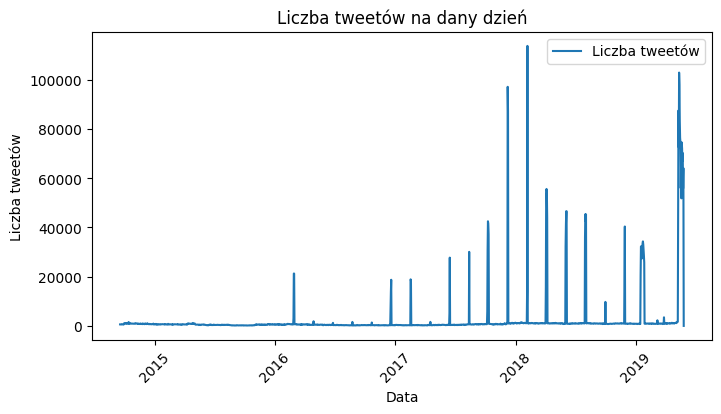

In [8]:
def tweets_per_day(data):
    data['Date'] = pd.to_datetime(data['Date']).dt.date

    tweets_count = data.groupby('Date').size()
    plt.figure(figsize=(8, 4))
    plt.plot(tweets_count.index, tweets_count.values, label='Liczba tweetów')
    plt.xlabel('Data')
    plt.ylabel('Liczba tweetów')
    plt.title('Liczba tweetów na dany dzień')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

tweets_per_day(data)

Cena bitcoina w czasie

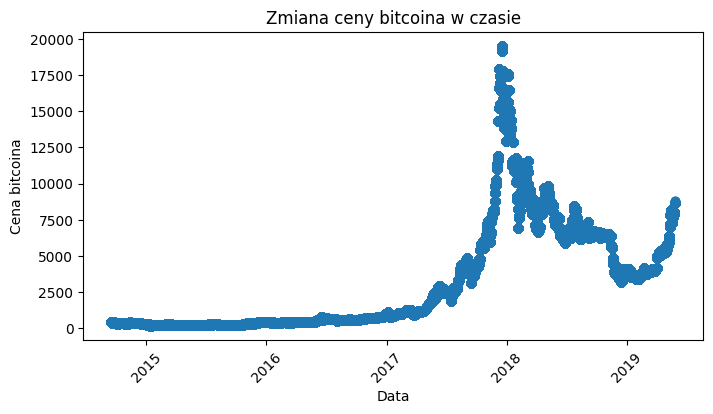

In [9]:
def visualize_bitcoin_price_scatter(data):
    data['Date'] = pd.to_datetime(data['Date']).dt.date

    plt.figure(figsize=(8, 4))
    plt.scatter(data['Date'], data['bitcoin_price'])
    plt.xlabel('Data')
    plt.ylabel('Cena bitcoina')
    plt.title('Zmiana ceny bitcoina w czasie')
    plt.xticks(rotation=45)
    plt.show()

visualize_bitcoin_price_scatter(data)